# Innovation patterns in the UK as determined by patent citations

### Relevant Imports

In [417]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import networkx as nx
import geopandas as gpd
import eurostat
import requests
import urllib.parse
from mpl_toolkits.mplot3d import Axes3D

We first consider the relevant data to investigate.

In [343]:
inventor_data = pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/Data/Patent data/202001_EPO_Inventor_reg.txt",sep="|")

In [371]:
inventor_data_GB = inventor_data.loc[inventor_data['ctry_code'] == "GB"]
addresses = list(inventor_data_GB["address"])
addresses[0]

'28 Lilac Court, Cherry Hinton Road,Cambridge CB1 4AY'

In [372]:
for i in range(10):
    address = str(addresses[i])
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    print(response[0]["lat"],response[0]["lon"])

IndexError: list index out of range

In [338]:
data_citations = pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/Data/Citation data/202001_EPO_CITATIONS.txt",sep="|")

Only consider Great Britain.

In [125]:
data_patents.loc[data_patents['ctry_code'] == "GB"]

,pct_nbr,internat_appln_nr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share
2,WO1978000004,WO1978GB00001,22653861.0,ADVANCED CHEMICAL EQUIPMENT LIMITED,"Mirfield, West Yorkshire, WF14 8BB",UKE44,GB,1.0,1.0
22,WO1979000002,WO1978GB00002,22653862.0,NATIONAL RESEARCH DEVELOPMENT CORPORATION,London SE1 6BU,UKI12,GB,1.0,1.0
73,WO1979000070,WO1978GB00007,22653867.0,"Joseph, Simon Philip",London S.W.13,UKI11,GB,1.0,1.0
100,WO1979000108,WO1978GB00010,22653869.0,"HARTLEY, David","Nr Meopham, Kent",UKJ42,GB,1.0,0.5
102,WO1979000109,WO1978GB00011,22653870.0,"HARTLEY, David","Nr Meopham, Kent",UKJ42,GB,1.0,0.5
...,...,...,...,...,...,...,...,...,...
3945353,WO2019143272,WO2019RU50003,516860702.0,CLS THERAPEUTICS LIMITED,GY1 1GX,GBZZZ,GB,1.0,1.0
3945401,WO2019143315,WO2018US13797,516858212.0,OWS AGRI LIMITED,London EC4Y 0DT,UKI11,GB,1.0,1.0
3945677,WO2019143561,WO2019US13496,516860525.0,ILLUMINA CAMBRIDGE LIMITED,CB21 6DF,GBZZZ,GB,1.0,0.5
3946122,WO2019143942,WO2019US14201,507653366.0,IQE PLC,Cardiiff CF3 0LW,UKL22,GB,1.0,1.0


In [339]:
data_citations

,Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
0,EP0000001,19781220,EP19780200013,16428854,DE2161506,19730614.0,DE,DE2161506,9912741.0,7,SEA,NaN,5.0,66.0,0
1,EP0000001,19781220,EP19780200013,16428854,FR2025459,19700911.0,FR,FR6942154,19548401.0,7,SEA,NaN,8.0,99.0,0
2,EP0000001,19781220,EP19780200013,16428854,US3532159,19701006.0,US,US3532159D,49957875.0,7,SEA,NaN,8.0,98.0,0
3,EP0000001,19781220,EP19780200013,16428854,US3568762,19710309.0,US,US3568762D,50023219.0,7,SEA,NaN,7.0,93.0,0
4,EP0000001,19781220,EP19780200013,16428854,US3913665,19751021.0,US,US40265573,50609500.0,7,SEA,NaN,3.0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13222449,EP3515163,20190724,EP20190159155,508236960,EP1701313,20060913.0,EP,EP20060076039,275377.0,4,SEA,A,13.0,154.0,0
13222450,EP3515163,20190724,EP20190159155,508236960,EP1993336,20081119.0,EP,EP20080156348,16424994.0,4,SEA,A,11.0,128.0,0
13222451,EP3515163,20190724,EP20190159155,508236960,US2006087823,20060427.0,US,US15134705,48199181.0,4,SEA,A,13.0,159.0,0
13222452,EP3515163,20190724,EP20190159155,508236960,US2006030171,20060209.0,US,US91058804,54106709.0,4,SEA,A,13.0,161.0,0


All citations regardless of the date.

In [413]:
i = 20
gb_data_citations = data_citations.loc[data_citations['Cited_App_auth'] == "GB"]
dates_available = np.sort(np.array(gb_data_citations['Citing_pub_date']))
gb_data_citations_day = gb_data_citations.loc[gb_data_citations['Citing_pub_date'] == dates_available[i]] # Full data
gb_data_citations_filt = np.array(gb_data_citations_day[['Citing_pub_nbr', 'Cited_pub_nbr']])

In [414]:
graph = nx.DiGraph()
graph.add_edges_from(gb_data_citations_filt)

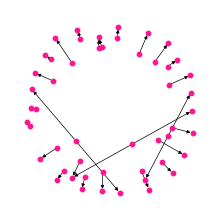

In [416]:
plt.figure(figsize=(2,2))
nx.draw(graph,
        with_labels = False,
        node_color='deeppink',
        node_size=10,
        width=0.5,
        arrowsize=5,
        font_color="black",
        font_size=2)

Visualising geographically.

In [539]:
file = "/Users/joebacchus/Desktop/Bartlett CASA/NUTS Shapefiles/NUTS_RG_20M_2021_3035.shp"
space = gpd.read_file(file)

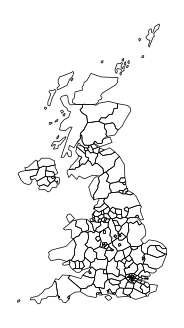

In [556]:
space_GB = space.loc[space['CNTR_CODE'] == "UK"]
space_GB_NUTS3 = space_GB.loc[space['LEVL_CODE'] == 3] # NUTS LEVEL
space_GB_NUTS3.plot(figsize=(4,4), facecolor='None', edgecolor='black', linewidth=0.5)
plt.axis("off")
plt.show()

In [557]:
space_GB_NUTS3.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
1486,UKJ46,3,UK,West Kent,West Kent,4.0,2,1,UKJ46,"POLYGON ((3654538.858 3181892.369, 3662855.211..."
1487,UKK11,3,UK,"Bristol, City of","Bristol, City of",4.0,1,1,UKK11,"POLYGON ((3445250.902 3228508.303, 3446880.534..."
1632,UKG31,3,UK,Birmingham,Birmingham,4.0,1,3,UKG31,"POLYGON ((3527065.057 3331411.801, 3517380.807..."
1633,UKG32,3,UK,Solihull,Solihull,4.0,1,3,UKG32,"POLYGON ((3536607.889 3323429.630, 3535052.070..."
1634,UKG33,3,UK,Coventry,Coventry,4.0,1,3,UKG33,"POLYGON ((3535052.070 3316159.068, 3536607.889..."


In [500]:
citations_data = pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/EPO_citation_UK_withIPC_loc.csv")
citations_data_GB = citations_data.loc[citations_data['ctry_code'] == "GB"]
citations_data_GB

,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route,prio_year,app_year,IPC,app_nbr,person_id,inv_name,address,reg_code,ctry_code,inv_share
2,EP19790300234,16436949,EP19780300203,16429410.0,5,SEA,NaN,0.0,5.0,0,1978,1979,A01N043/40,EP19790300234,2219864,"Cartwright, David","1 Stonehaven Drive Woodley,Reading Berkshire",UKJ11,GB,1.000000
3,EP19790300237,16436952,EP19780300148,16429355.0,2,SEA,NaN,0.0,7.0,0,1978,1979,A61K031/43,EP19790300237,2218537,"Watson, Nigel Stephen","5 Ruislip Close,Greenford Middlesex",UKI23,GB,0.333333
4,EP19790300237,16436952,EP19780300148,16429355.0,2,SEA,NaN,0.0,7.0,0,1978,1979,A61K031/43,EP19790300237,2232864,"Cherry, Peter Clive","12 Thistledene Avenue,South Harrow Middlesex",UKI23,GB,0.333333
5,EP19790300237,16436952,EP19780300148,16429355.0,2,SEA,NaN,0.0,7.0,0,1978,1979,A61K031/43,EP19790300237,2232865,"Evans, Derek Norman","17 Mount Park Road Ealing,London W5",UKI23,GB,0.333333
6,EP19790300251,16436966,EP19780300203,16429410.0,6,EXA,NaN,0.0,6.0,0,1978,1979,A01N043/40,EP19790300251,2232891,"Cartwright, David","1 Stonehaven Drive,Woodley Reading Berkshire",UKJ11,GB,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189388,EP20180152223,488853923,EP20150152853,425933360.0,8,SEA,XI,3.0,35.0,0,2018,2018,H02K001/14,EP20180152223,45051960,"Wu, Zhan-Yuan","57 Hallam Grange Crescent,Sheffield, S10 4BB",UKE32,GB,0.250000
189389,EP20180152223,488853923,EP20150152853,425933360.0,8,SEA,XI,3.0,35.0,0,2018,2018,H02K001/14,EP20180152223,47000713,"Thomas, Arwyn","3 Almond Tree Road, Cheadle Hulme,Cheshire, SK...",UKD31,GB,0.250000
189390,EP20180152223,488853923,EP20150152853,425933360.0,8,SEA,XI,3.0,35.0,0,2018,2018,H02K001/14,EP20180152223,69823927,"Duke, Alexander","9, Lister Road,Sheffield, S6 5AG",UKE32,GB,0.250000
189391,EP20180152223,488853923,EP20150152853,425933360.0,8,SEA,XI,3.0,35.0,0,2018,2018,H02K001/14,EP20180152223,69856282,"Azar, Ziad","41 Winchester Crescent,Sheffield, S10 4ED",UKE32,GB,0.250000


In [647]:
merged_data = space_GB_NUTS3.merge(citations_data_GB, left_on='FID', right_on='reg_code')

In [648]:
merged_data.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,...,prio_year,app_year,IPC,app_nbr,person_id,inv_name,address,reg_code,ctry_code,inv_share
0,UKK11,3,UK,"Bristol, City of","Bristol, City of",4.0,1,1,UKK11,"POLYGON ((3445250.902 3228508.303, 3446880.534...",...,1981,1982,C12P007/42,EP19820300391,2338781,"Barham, Peter John","37 Concord Drive,South Mead Bristol BS10 6PY",UKK11,GB,0.500000
1,UKK11,3,UK,"Bristol, City of","Bristol, City of",4.0,1,1,UKK11,"POLYGON ((3445250.902 3228508.303, 3446880.534...",...,1980,1982,C07C 405/00,EP19820305188,2347184,"Barham, Peter John","4 Hampton Road,Redland Bristol BS6 6HJ",UKK11,GB,0.500000
2,UKK11,3,UK,"Bristol, City of","Bristol, City of",4.0,1,1,UKK11,"POLYGON ((3445250.902 3228508.303, 3446880.534...",...,1982,1983,A61K031/40,EP19830307446,2397321,"Platt, Ronald","10, Worthington Close,Henbury Macclesfield Che...",UKK11,GB,0.333333
3,UKK11,3,UK,"Bristol, City of","Bristol, City of",4.0,1,1,UKK11,"POLYGON ((3445250.902 3228508.303, 3446880.534...",...,1982,1983,A61K031/40,EP19830307446,2397321,"Platt, Ronald","10, Worthington Close,Henbury Macclesfield Che...",UKK11,GB,0.333333
4,UKK11,3,UK,"Bristol, City of","Bristol, City of",4.0,1,1,UKK11,"POLYGON ((3445250.902 3228508.303, 3446880.534...",...,1983,1984,G01B007/00,EP19840300761,1067042,"Howell, Mark Ian","23 Windsor Court Clifton,Bristol BS8 4LJ",UKK11,GB,1.000000


KeyboardInterrupt: 

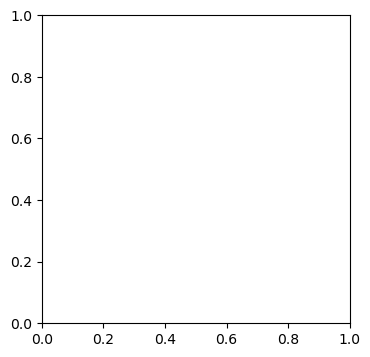

In [1193]:
merged_data.plot(figsize=(4,4), column='COAST_TYPE', cmap='Reds', linewidth=0.3, edgecolor='0.9')  
plt.axis("off")

plt.show()

In [591]:
IPC_translations = pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/All_IPC.txt", sep="	")
IPC_translations

,IPC,Description
0,A,HUMAN NECESSITIES
1,A01,AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTI...
2,A01B,SOIL WORKING IN AGRICULTURE OR FORESTRY; PARTS...
3,A01B0001000000,Hand tools (edge trimmers for lawns A01G000306...
4,A01B0001020000,Spades; Shovels
...,...,...
79731,H10N0097000000,Electric solid-state thin-film or thick-film d...
79732,H10N0099000000,Subject matter not provided for in other group...
79733,H99,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...
79734,H99Z,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...


In [1189]:
IPC_scale = 4
IPC_reduced = IPC_translations.loc[IPC_translations['IPC'].str.len()==IPC_scale]
merged_data = space_GB_NUTS3.merge(citations_data_GB, left_on='FID', right_on='reg_code')
merged_data["IPC"] = merged_data["IPC"].str[0:IPC_scale]
merged_data_named = merged_data.merge(IPC_reduced, left_on='IPC', right_on='IPC')
contents = np.sort(list(merged_data_named["IPC"].unique()))

In [1190]:
dates = np.sort(list(merged_data_named["prio_year"].unique()))
store = [[]]

In [1191]:
for i in range(0,len(dates)):
    merged_data_named_spec = merged_data_named.loc[merged_data_named['prio_year'] == dates[i]]
    frequencies = dict(merged_data_named_spec["IPC"].value_counts())
    frequencies_des = dict(merged_data_named_spec["Description"].value_counts())
    store.append(list(frequencies_des.items()))
    
store = store[1:]

1979


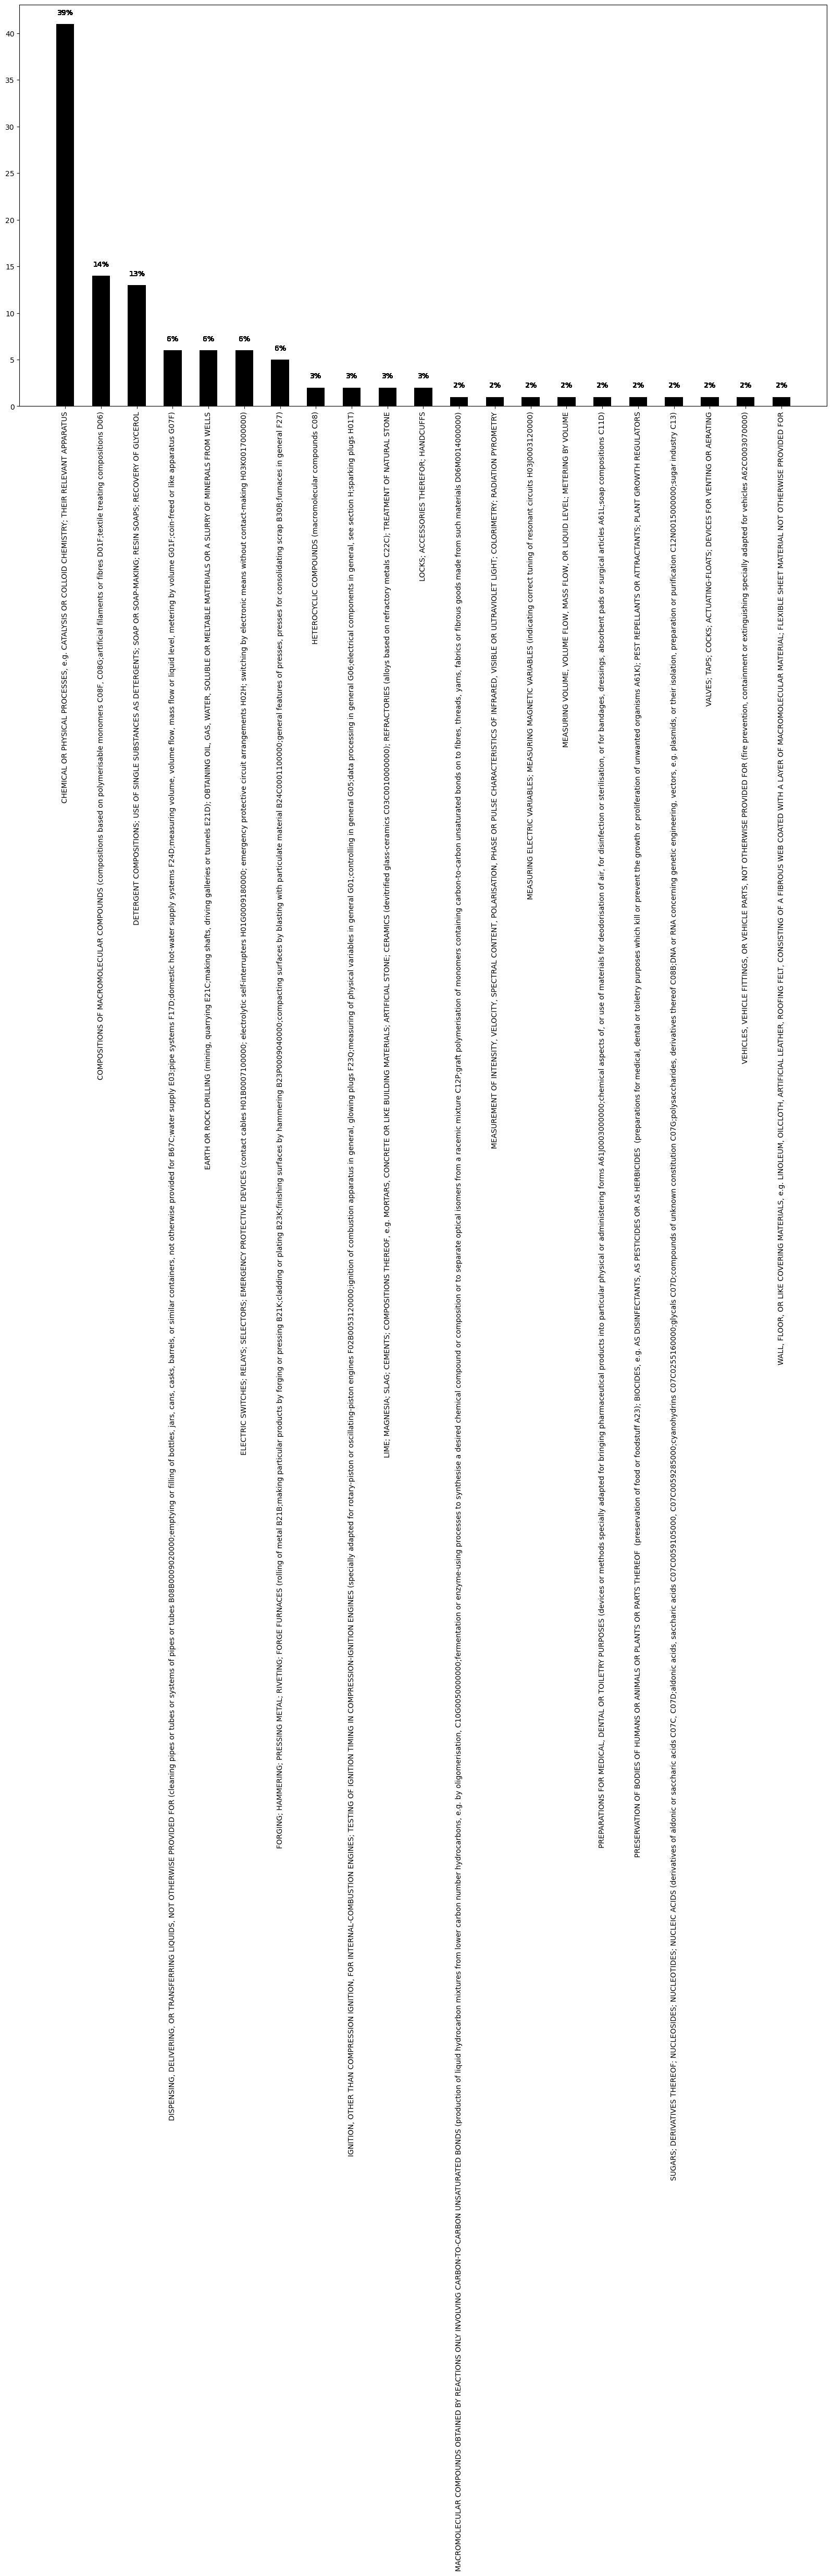

In [1192]:
select = 2
print(dates[select])
plt.figure(figsize=(20,10))
patches = plt.bar(sorted(dict(store[select]).keys()), dict(store[select]).values(), width=0.5, color='black')
plt.xticks(rotation=90)
total = sum(dict(store[select]).values())
for i in range(len(contents)):
    for patch in patches:
        x = patch.get_x() + patch.get_width()/2
        y = patch.get_height() + 1
        plt.annotate(str(int(round(float('{:.1f}'.format(y))/total,2)*100))+'%', (x, y), ha='center')
plt.show()

In [ ]:
pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/EPO_citation_UK_withIPC_loc.csv")